In [253]:

import pandas as pd
from keras.models import Sequential
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline


In [254]:
#Read the data from the dataset

training_data_df = pd .read_csv('pima_indians_diabetes.csv')
testing_data_df = pd.read_csv('pima_indians_diabetes_test.csv')


In [255]:
training_data_df.head()


,pregnant_times,glucose_tolerance_test,Diastolic_blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,Class_variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [256]:
testing_data_df.head()

,pregnant_times,glucose_tolerance_test,Diastolic_blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,Class_variable
0,4,118,70,0,0,44.5,0.904,26,0
1,2,122,76,27,200,35.9,0.483,26,0
2,6,125,78,31,0,27.6,0.565,49,1
3,1,168,88,29,0,35.0,0.905,52,1
4,2,129,0,0,0,38.5,0.304,41,0


In [257]:
### scale the values to 0&1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

scaled_train = scaler.fit_transform(training_data_df)
scaled_test = scaler.transform(testing_data_df)

### creating pandas dataframe for scaled data

scaled_train_df = pd.DataFrame(data=scaled_train,columns=training_data_df.columns.values)
scaled_test_df = pd.DataFrame(data=scaled_test,columns=testing_data_df.columns.values)

scaled_train_df.to_csv('pima_train_scaled.csv',index=False)
scaled_test_df.to_csv('pima_test_scaled.csv',index=False)

In [258]:
#### creating a neural net model

model = Sequential()
model.add(Dense(10,input_dim=8,activation='elu'))
model.add(Dense(50,activation='elu'))
model.add(Dense(50,activation='elu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [259]:
###Loading scaled dataset

scaled_training_data = pd .read_csv('pima_train_scaled.csv')

X_train = scaled_training_data.drop(['Class_variable'],axis=1).values
Y_train = scaled_training_data['Class_variable'].values

scaled_testing_data = pd.read_csv('pima_test_scaled.csv')

X_test = scaled_testing_data.drop(['Class_variable'],axis=1).values
Y_test = scaled_testing_data['Class_variable'].values


In [260]:
#Fitting the Model
pima_model= model.fit(X_train,Y_train,shuffle=True,verbose=2,epochs=100)

Epoch 1/100
0s - loss: 0.2123 - acc: 0.6823
Epoch 2/100
0s - loss: 0.1868 - acc: 0.7044
Epoch 3/100
0s - loss: 0.1797 - acc: 0.7266
Epoch 4/100
0s - loss: 0.1781 - acc: 0.7292
Epoch 5/100
0s - loss: 0.1713 - acc: 0.7448
Epoch 6/100
0s - loss: 0.1671 - acc: 0.7409
Epoch 7/100
0s - loss: 0.1697 - acc: 0.7500
Epoch 8/100
0s - loss: 0.1627 - acc: 0.7695
Epoch 9/100
0s - loss: 0.1627 - acc: 0.7591
Epoch 10/100
0s - loss: 0.1635 - acc: 0.7578
Epoch 11/100
0s - loss: 0.1538 - acc: 0.7734
Epoch 12/100
0s - loss: 0.1519 - acc: 0.7760
Epoch 13/100
0s - loss: 0.1527 - acc: 0.7799
Epoch 14/100
0s - loss: 0.1518 - acc: 0.7865
Epoch 15/100
0s - loss: 0.1502 - acc: 0.7747
Epoch 16/100
0s - loss: 0.1576 - acc: 0.7643
Epoch 17/100
0s - loss: 0.1471 - acc: 0.7865
Epoch 18/100
0s - loss: 0.1460 - acc: 0.7969
Epoch 19/100
0s - loss: 0.1484 - acc: 0.7852
Epoch 20/100
0s - loss: 0.1483 - acc: 0.7839
Epoch 21/100
0s - loss: 0.1455 - acc: 0.7995
Epoch 22/100
0s - loss: 0.1510 - acc: 0.7878
Epoch 23/100
0s - l

In [261]:
test_error_rate  = model.evaluate(X_test,Y_test,verbose=0)

print('Test error rate is {}'.format(test_error_rate[0]))
print('Accuracy on test dataset {}'.format(test_error_rate[1]*100))

Test error rate is 0.11185280552160913
Accuracy on test dataset 88.40579710144928


In [262]:
model.save('pima_keras_model.h5')

In [263]:
#Loading a test dataset to make predictions on new dataset
predict_data = pd .read_csv('pima_predictions.csv').values


In [264]:

predictions = model.predict(predict_data)

for pred_data in predictions:
      print(round(pred_data[0]))

1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
-0.0
1.0
0.0
0.0
0.0
0.0
1.0
-0.0


In [265]:
print('Accuracy on the test dataset:',pima_model.history['acc'])


Accuracy on the test dataset: [0.68229166666666663, 0.70442708333333337, 0.7265625, 0.72916666666666663, 0.74479166666666663, 0.74088541666666663, 0.75, 0.76953125, 0.75911458333333337, 0.7578125, 0.7734375, 0.77604166666666663, 0.77994791666666663, 0.78645833333333337, 0.77473958333333337, 0.76432291666666663, 0.78645833333333337, 0.796875, 0.78515625, 0.78385416666666663, 0.79947916666666663, 0.78776041666666663, 0.78125, 0.79947916666666663, 0.79296875, 0.79947916666666663, 0.796875, 0.79427083333333337, 0.78776041666666663, 0.796875, 0.79296875, 0.78645833333333337, 0.80729166666666663, 0.8046875, 0.80078125, 0.796875, 0.796875, 0.8125, 0.8125, 0.796875, 0.80338541666666663, 0.80078125, 0.8046875, 0.80989583333333337, 0.81119791666666663, 0.81380208333333337, 0.80859375, 0.79947916666666663, 0.81901041666666663, 0.80859375, 0.80859375, 0.81770833333333337, 0.81510416666666663, 0.80598958333333337, 0.81901041666666663, 0.81901041666666663, 0.8203125, 0.81770833333333337, 0.822916666

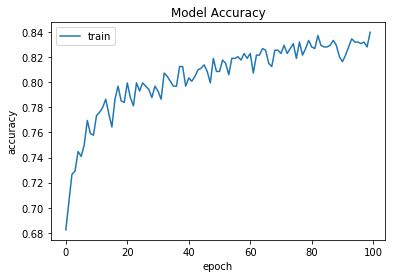

In [266]:

plt.plot(pima_model.history['acc'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()